In [3]:
from pre3 import data_pre
from input_data import input_df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
df = input_df()
df = data_pre(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47008266
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   都道府県名         651975 non-null  category
 1   市区町村名         651975 non-null  category
 2   地区名           651318 non-null  category
 3   最寄駅：名称        649342 non-null  category
 4   最寄駅：距離（分）     628916 non-null  float64 
 5   間取り           629546 non-null  category
 6   面積（㎡）         651975 non-null  float64 
 7   建築年           633280 non-null  float64 
 8   建物の構造         637098 non-null  category
 9   用途            601333 non-null  category
 10  今後の利用目的       288948 non-null  category
 11  都市計画          633162 non-null  category
 12  建ぺい率（％）       629168 non-null  float64 
 13  容積率（％）        629168 non-null  float64 
 14  取引時点          651975 non-null  float64 
 15  改装            593301 non-null  category
 16  取引の事情等        18397 non-null   category
 17  取引価格（総額）_log  651975 

In [5]:
df[["都道府県名", "建物の構造", "取引価格（総額）_log"]]

,都道府県名,建物の構造,取引価格（総額）_log
ID,,,
1117225,北海道,ＲＣ,7.431364
1114724,北海道,ＲＣ,6.342423
1114753,北海道,ＲＣ,6.778151
1120806,北海道,ＲＣ,7.230449
1117264,北海道,ＲＣ,7.204120
...,...,...,...
47008534,沖縄県,ＳＲＣ,7.342423
47007866,沖縄県,ＲＣ,7.447158
47029524,沖縄県,ＲＣ,7.000000


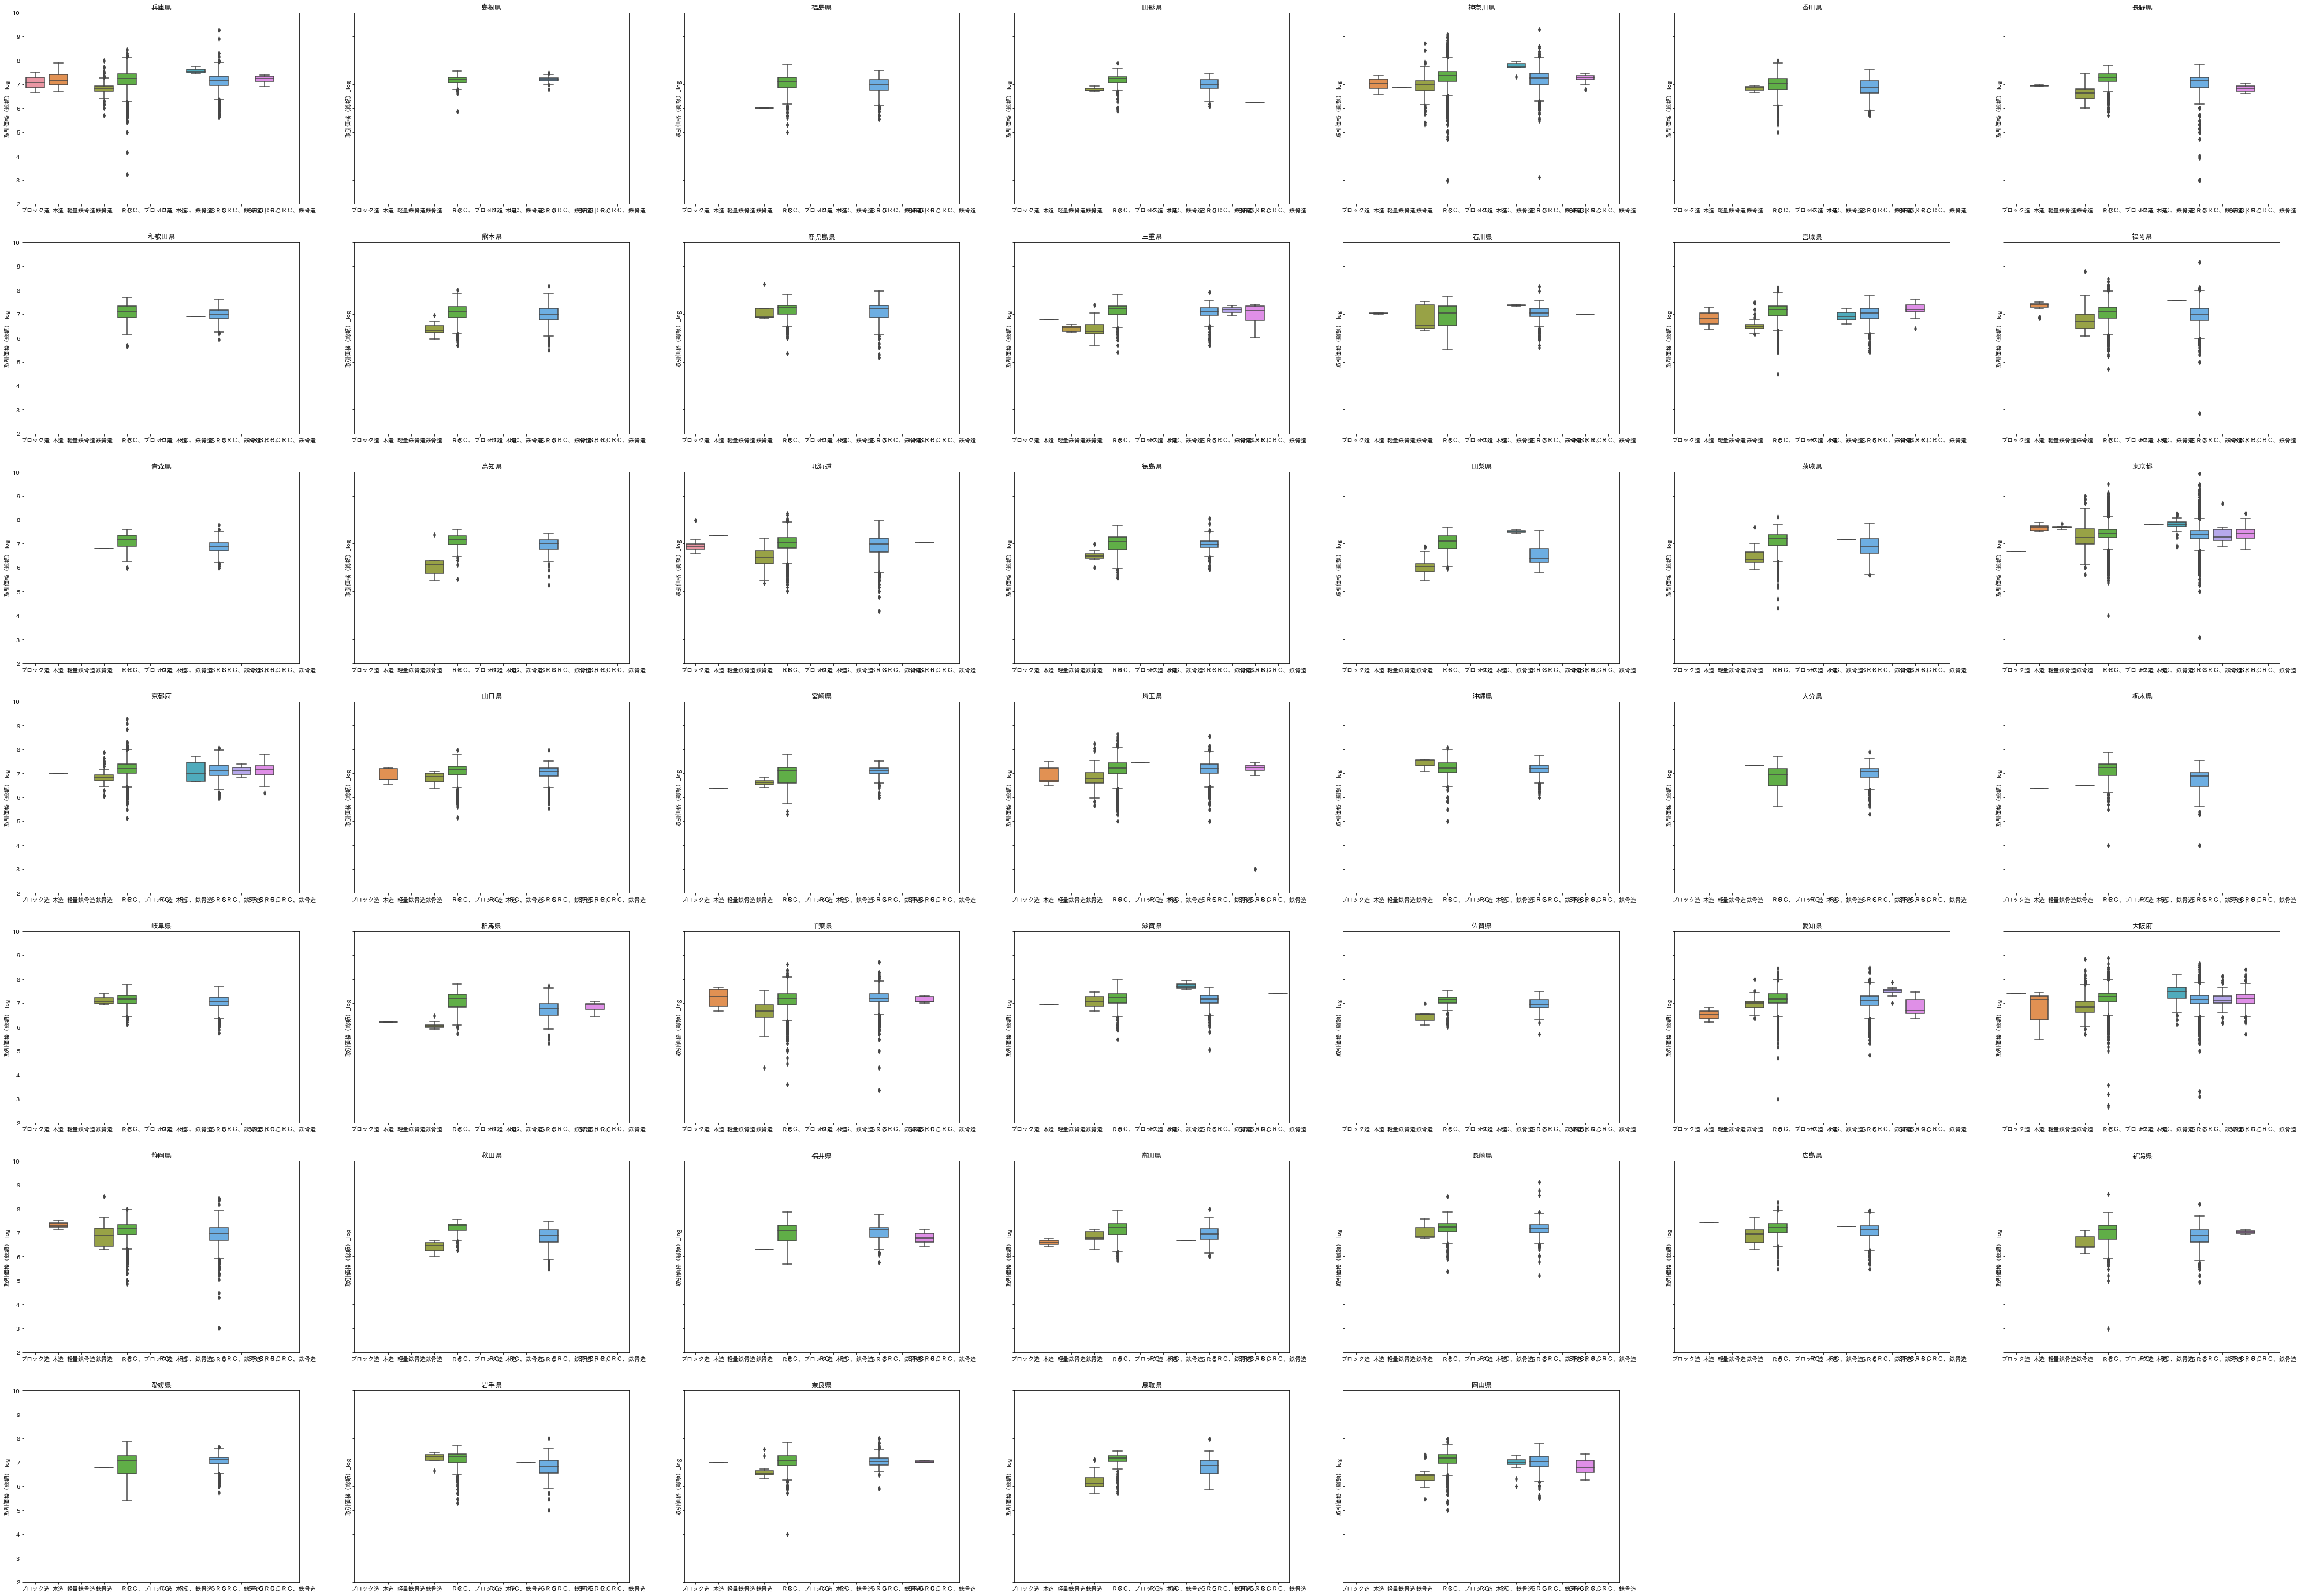

In [23]:
# 仮説 : 建物の構造によって価格が違うのではないか
import seaborn as sns
pref_list = df["都道府県名"].tolist()
pref_list = set(pref_list)

fig, ax = plt.subplots(7, 7, figsize=(70, 50), sharey=True)
for i, pref in enumerate(pref_list):
    sns.boxplot(
        x='建物の構造', y='取引価格（総額）_log',
        data=df[df.都道府県名==pref].sort_values('建物の構造'),
        ax=ax[divmod(i, 7)]).set(title=pref, xlabel=None, ylim=(2, 10))

# hide excess graphs
for i in range(len(pref_list)-7*7, 0):
  ax[-1, i].axis('off')


plt.show()

In [ ]:
sns.boxplot(x='建物の構造', y='取引価格（総額）_log',data=df.sort_values('建物の構造')).set(xlabel=None, ylim=(2, 10))

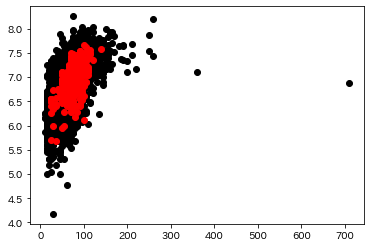

In [31]:
import numpy as np
# 各県の都市部から離れているほうが価格が安い
# 山梨県

pref = "北海道"
area = "小樽市"

data =  df[df["都道府県名"]==pref].reset_index()

main = data[data["市区町村名"]==area]
nmain = data[data["市区町村名"]!=area]

plt.scatter(nmain['面積（㎡）'], nmain['取引価格（総額）_log'], color='black')
plt.scatter(main['面積（㎡）'], main['取引価格（総額）_log'], color='red')
plt.show()


In [27]:
set(df[(df["都道府県名"]=="北海道") & (df["取引価格（総額）_log"] > 7.5)]["市区町村名"].tolist())

{'函館市',
 '小樽市',
 '帯広市',
 '旭川市',
 '札幌市中央区',
 '札幌市北区',
 '札幌市南区',
 '札幌市厚別区',
 '札幌市東区',
 '札幌市白石区',
 '札幌市西区',
 '札幌市豊平区'}

In [62]:
# 都道府県ごとに面積当たりの価格の平均が高いところを調べたい
data = df.query(f"都道府県名=='北海道'").groupby('市区町村名').mean()

In [19]:
df[df["都道府県名"] == "北海道"]

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,緯度,経度,クラスタ平均
ID,,,,,,,,,,,,,,,,,,,,,
1117225,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,120.0,12.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2018.75,未改装,NaN,7.431364,42.631246,141.603122,2.0
1114724,北海道,苫小牧市,青葉町,青葉,9.0,３ＬＤＫ,70.0,35.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2017.75,未改装,NaN,6.342423,42.631246,141.603122,2.0
1114753,北海道,苫小牧市,青葉町,青葉,3.0,３ＬＤＫ,70.0,31.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2016.50,改装済,NaN,6.778151,42.631246,141.603122,2.0
1120806,北海道,苫小牧市,表町,苫小牧,8.0,４ＬＤＫ,105.0,18.0,ＲＣ,住宅,...,商業地域,80.0,400.0,2011.99,未改装,NaN,7.230449,42.631246,141.603122,2.0
1117264,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,90.0,15.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2015.50,未改装,NaN,7.204120,42.631246,141.603122,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106894,北海道,北見市,幸町,北見,19.0,３ＬＤＫ,75.0,32.0,ＲＣ,住宅,...,第２種住居地域,60.0,200.0,2014.50,改装済,NaN,6.826075,43.803976,143.895784,2.0
1105086,北海道,北見市,桜町,北見,12.0,１ＬＤＫ,70.0,13.0,ＲＣ,住宅,...,第２種住居地域,60.0,200.0,2016.50,改装済,NaN,6.954243,43.803976,143.895784,2.0
1112678,北海道,北見市,三住町,北見,11.0,２ＬＤＫ,75.0,31.0,ＲＣ,住宅,...,第１種住居地域,60.0,200.0,2011.75,未改装,NaN,6.698970,43.803976,143.895784,2.0


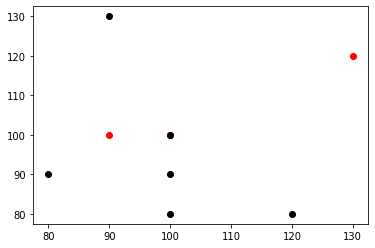

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pref = ["東京", "東京", "東京", "埼玉", "埼玉", "埼玉", "千葉", "千葉", "千葉"]
s2 = [100, 130, 90, 100, 120, 100, 80, 90, 100]
value = [100, 120, 100, 80, 80, 90, 90, 130, 100]
df_t = pd.DataFrame({'都道府県':pref, '面積': s2, '価格':value})

index_list = df_t[df_t["都道府県"]=="東京"].index

x = np.array(df_t["面積"])
y = np.array(df_t["価格"])

for i in range(len(x)):
    plt.scatter(x[i], y[i], color='red') if i in index_list else plt.scatter(x[i], y[i], color='black')
plt.show()


In [6]:
df_t

,都道府県,面積,価格
0,東京,100,100
1,東京,130,120
2,東京,90,100
3,埼玉,100,80
4,埼玉,120,80
5,埼玉,100,90
6,千葉,80,90
7,千葉,90,130
8,千葉,100,100


In [45]:
data.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,緯度,経度,クラスタ平均
0,13212660,東京都,中野区,中央,新中野,6.0,２Ｋ,25.0,45.0,ＳＲＣ,...,商業地域,80.0,500.0,2009.99,未改装,NaN,7.041393,35.707533,139.663759,0.0
1,13141865,東京都,中野区,弥生町,中野富士見町,7.0,１Ｋ,20.0,15.0,ＲＣ,...,第１種低層住居専用地域,60.0,150.0,2019.50,改装済,NaN,7.322219,35.707533,139.663759,0.0
2,13139208,東京都,中野区,本町,新中野,6.0,２ＤＫ,40.0,34.0,ＲＣ,...,近隣商業地域,80.0,400.0,2015.25,未改装,NaN,7.342423,35.707533,139.663759,0.0
3,13135172,東京都,中野区,中央,中野(東京),6.0,２ＤＫ,40.0,52.0,ＲＣ,...,近隣商業地域,80.0,400.0,2016.99,未改装,NaN,7.255273,35.707533,139.663759,0.0
4,13137989,東京都,中野区,東中野,落合(東京),7.0,１ＬＤＫ,50.0,47.0,ＳＲＣ,...,第１種中高層住居専用地域,60.0,200.0,2017.25,未改装,NaN,7.462398,35.707533,139.663759,0.0
